In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV file
raw = pd.read_csv("PDB_Load_History.csv")

In [ ]:
print("Shape:", raw.shape)
print("Columns:", raw.columns.tolist())

Shape: (103776, 8)
Columns: ['date', 'year', 'month', 'day', 'weekday', 'hour', 'demand', 'temperature']


In [ ]:
print("\nMissing values:\n", raw.isna().sum())


Missing values:
 date           0
year           0
month          0
day            0
weekday        0
hour           0
demand         0
temperature    0
dtype: int64


In [ ]:
display(raw.head(5))
display(raw.tail(5))

,date,year,month,day,weekday,hour,demand,temperature
0,3/1/2003,2003,3,1,7,1,12863.0,29
1,3/1/2003,2003,3,1,7,2,12389.0,28
2,3/1/2003,2003,3,1,7,3,12155.0,29
3,3/1/2003,2003,3,1,7,4,12072.0,27
4,3/1/2003,2003,3,1,7,5,12160.0,29


,date,year,month,day,weekday,hour,demand,temperature
103771,12/31/2014,2014,12,31,4,20,16955.0,22
103772,12/31/2014,2014,12,31,4,21,16243.0,21
103773,12/31/2014,2014,12,31,4,22,15525.0,21
103774,12/31/2014,2014,12,31,4,23,14759.0,18
103775,12/31/2014,2014,12,31,4,24,14071.0,19


In [ ]:
# Parse timestamp
dt = pd.to_datetime(raw['date'], format="%m/%d/%Y", errors='coerce')
hour = raw['hour'].astype(int)

In [ ]:
ts = dt + pd.to_timedelta((hour % 24), unit='h')
# if hour == 24, shift to next day at 00:00
next_day_mask = (hour == 24)
ts[next_day_mask] = dt[next_day_mask] + pd.to_timedelta(24, unit='h')

In [ ]:
df = raw.copy()
df['timestamp'] = ts
df = df.sort_values('timestamp').set_index('timestamp')

In [ ]:
print("\nDate range:", df.index.min(), "→", df.index.max())
print("Hourly frequency guess:", pd.infer_freq(df.index[:1000]))


Date range: 2003-03-01 01:00:00 → 2015-01-01 00:00:00
Hourly frequency guess: h


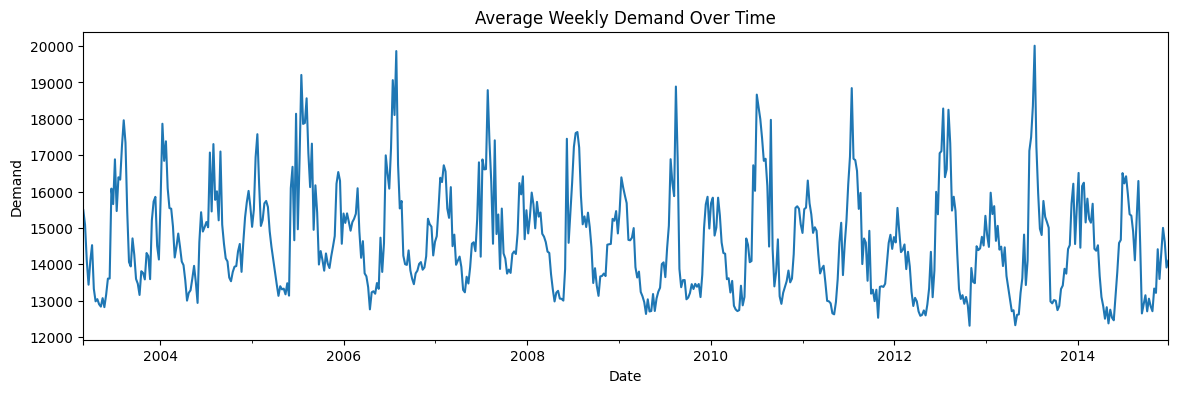

In [ ]:
# EDA
#Plot demand over time (sample for speed)
plt.figure(figsize=(14,4))
df['demand'].resample('7D').mean().plot()
plt.title("Average Weekly Demand Over Time")
plt.xlabel("Date"); plt.ylabel("Demand")
plt.show()

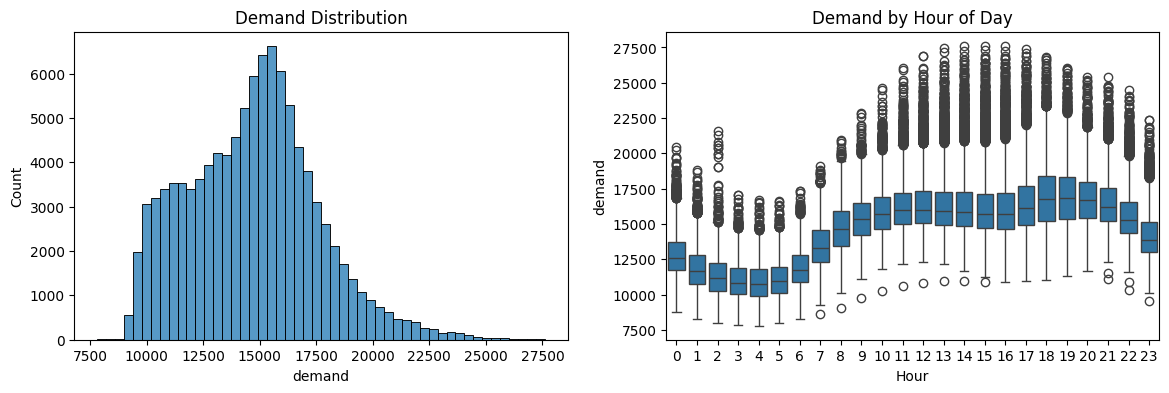

In [ ]:
# Distribution & seasonality cues
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sns.histplot(df['demand'], bins=50, ax=ax[0])
ax[0].set_title("Demand Distribution")

sns.boxplot(x=df.index.hour, y=df['demand'], ax=ax[1])
ax[1].set_title("Demand by Hour of Day")
ax[1].set_xlabel("Hour")
plt.show()